# Certificado IBM (Data Analysis with Python): Módulo 5

## Model Evaluation and Refinement

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lr = LinearRegression()
lr.fit(x_train1[['horsepower']], y_train1)
lr.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [ ]:
results = cross_val_score(lr, x_train1[['horsepower']], y_train1, cv=2)
results.mean()

0.5013582140365245

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [ ]:
pr1 = PolynomialFeatures(degree=2)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [ ]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [ ]:
x_train_pr1.shape

(110, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [ ]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


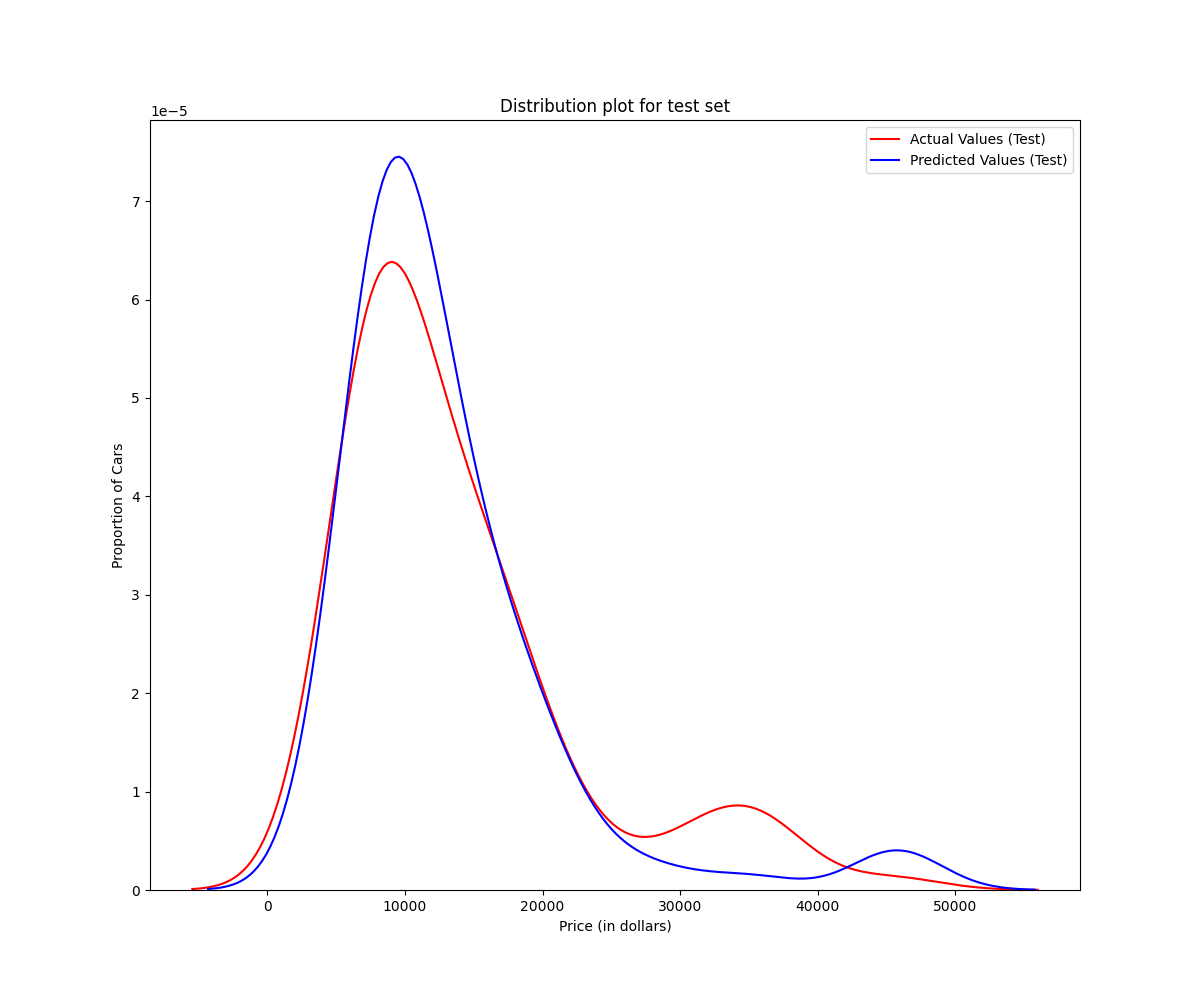

In [ ]:
predictions = poly1.predict(x_test_pr1)
DistributionPlot(y_test, predictions, "Actual Values (Test)", "Predicted Values (Test)", "Distribution plot for test set")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


Above 25000 dollars, the predicted values are too small compared to the actual values up to 40000 where the results are inverted. Also at the top of 10000 the predictions are actually greater than the actual values.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [ ]:
best_RigeModel=Ridge(alpha=10) # Create new model
best_RigeModel.fit(x_train_pr, y_train) # Train model with data

test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train) # Evaluate model
print(f"Train R^2: {train_score}\tTest R^2: {test_score}")

Train R^2: 0.8592747376868942	Test R^2: 0.5637701868993854
